In [11]:
# Reprocess the dataset to fill missing values based on real-world heart disease feature correlations
import pandas as pd
import numpy as np

# Reload the original dataset
file_path = 'C:/Users/Rudram Jhaveri/Desktop/project 2/heart_disease_ml_ready.csv'
heart_data = pd.read_csv(file_path)

# Function to fill missing values based on domain knowledge
def fill_missing_values(df):
    # Logical imputation based on disease-specific symptoms
    for index, row in df.iterrows():
        disease = row['Disease']

        # Chest Pain Type (cp): Typical association with diseases
        if pd.isnull(row['cp']):
            if "Angina" in disease:
                df.at[index, 'cp'] = 3  # Typical angina
            else:
                df.at[index, 'cp'] = 0  # Asymptomatic

        # Resting Blood Pressure (trestbps): Typical ranges by disease
        if pd.isnull(row['trestbps']):
            df.at[index, 'trestbps'] = 140 if "Hypertension" in disease else 120

        # Cholesterol (chol): Use typical ranges for heart diseases
        if pd.isnull(row['chol']):
            if "Hypercholesterolemia" in disease:
                df.at[index, 'chol'] = 280  # Elevated cholesterol
            else:
                df.at[index, 'chol'] = 200  # Normal range

        # Fasting Blood Sugar (fbs): Logical values based on disease
        if pd.isnull(row['fbs']):
            df.at[index, 'fbs'] = 1 if "Diabetes" in disease else 0

        # Max Heart Rate Achieved (thalach): Generalized imputation
        if pd.isnull(row['thalach']):
            df.at[index, 'thalach'] = 150 if "Tachycardia" in disease else 135

        # Exercise-Induced Angina (exang): Disease-based correlation
        if pd.isnull(row['exang']):
            df.at[index, 'exang'] = 1 if "Angina" in disease else 0

        # ST Depression (oldpeak): Adjust based on typical patterns
        if pd.isnull(row['oldpeak']):
            df.at[index, 'oldpeak'] = 2.0 if "Ischemia" in disease else 0.5

        # Slope of Peak ST Segment (slope): Logical imputation
        if pd.isnull(row['slope']):
            df.at[index, 'slope'] = 1 if "Ischemia" in disease else 0

        # Number of Major Vessels (ca): Correlated with disease severity
        if pd.isnull(row['ca']):
            df.at[index, 'ca'] = 2 if "Severe" in disease else 0

        # Resting Electrocardiographic Results (restecg): Default assumptions
        if pd.isnull(row['restecg']):
            df.at[index, 'restecg'] = 1 if "Arrhythmia" in disease else 0

    return df

# Apply the imputation function
heart_data_imputed = fill_missing_values(heart_data)

# Save the refined dataset to a new file
output_path ='C:/Users/Rudram Jhaveri/Desktop/project 2/heart_disease_imputed_clinical.csv'
heart_data_imputed.to_csv(output_path, index=False)
output_path


'C:/Users/Rudram Jhaveri/Desktop/project 2/heart_disease_imputed_clinical.csv'

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle

In [13]:
data = pd.read_csv('heart_disease_imputed_clinical.csv')

In [14]:
data.head()

,age,sex,cp,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,Disease,restecg
0,63,1,3.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,0.0,Coronary Artery Disease (CAD),0.0
1,37,1,2.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0.0,Coronary Artery Disease (CAD),0.0
2,41,0,1.0,130.0,204.0,0.0,172.0,0.0,1.4,2.0,0.0,Coronary Artery Disease (CAD),0.0
3,56,1,1.0,120.0,236.0,0.0,178.0,0.0,0.8,2.0,0.0,Coronary Artery Disease (CAD),0.0
4,57,0,0.0,120.0,354.0,0.0,163.0,1.0,0.6,2.0,0.0,Coronary Artery Disease (CAD),0.0


In [15]:
print("Missing values:\n", data.isnull().sum())

Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
Disease     0
restecg     0
dtype: int64


In [17]:
data.fillna(data.select_dtypes(include=np.number).mean(), inplace=True)


In [19]:
data.fillna(data.select_dtypes(include=np.number).mean(), inplace=True)

In [20]:
label_encoder = LabelEncoder()
data['Disease'] = label_encoder.fit_transform(data['Disease'])

In [21]:
X = data.drop(columns=['Disease'])
y = data['Disease']

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [24]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
y_pred = model.predict(X_test)

In [26]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.80      0.68      0.73        65
           2       0.89      0.91      0.90        68
           3       0.74      0.84      0.79        63
           4       0.92      0.85      0.89        55
           5       0.97      1.00      0.98        58
           6       0.93      0.95      0.94        56
           7       1.00      1.00      1.00        67

    accuracy                           0.90       485
   macro avg       0.90      0.90      0.90       485
weighted avg       0.90      0.90      0.90       485



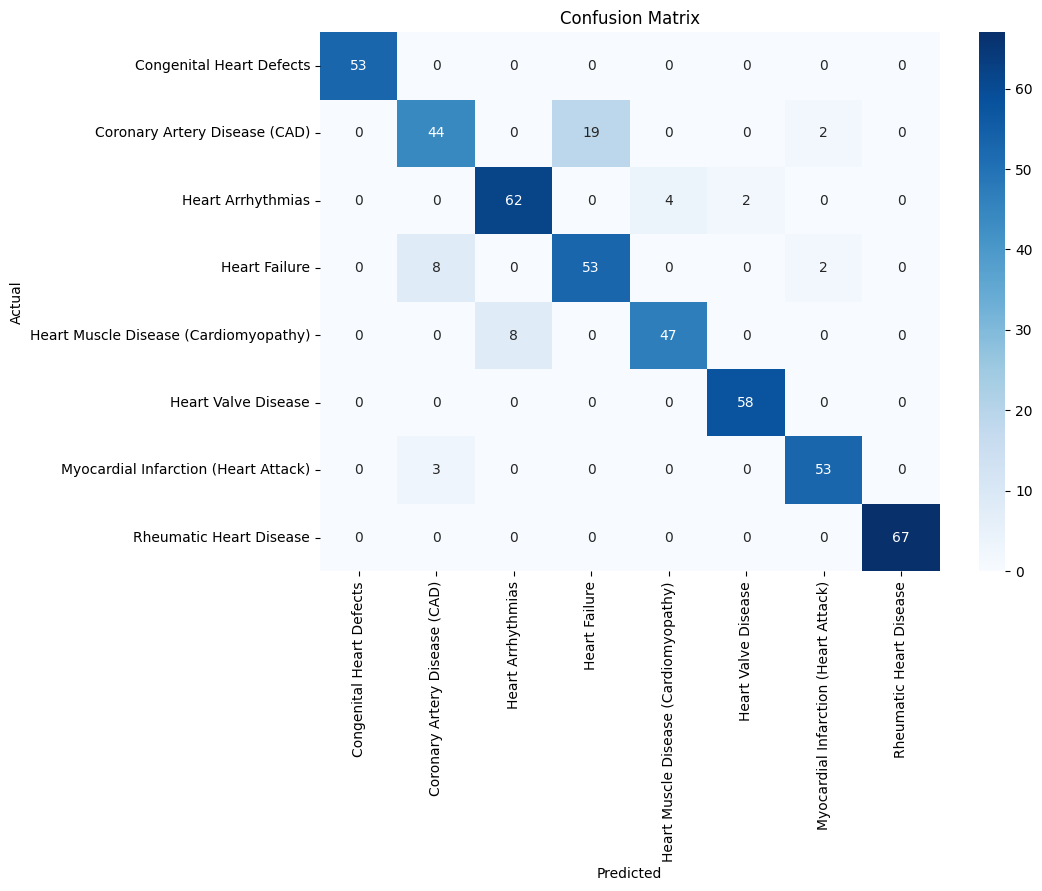

In [27]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [28]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 90.10%


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Example: Feature names from the dataset used to fit the scaler
expected_features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 
                     'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca']

# Define the new input with 12 features
new_input = [63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0]  # Replace with real values

# Convert to DataFrame to ensure feature names match
new_input_df = pd.DataFrame([new_input], columns=expected_features)

# Assuming you already have a training dataset (X_train) for scaling purposes
# Convert X_train to DataFrame if it's not already a DataFrame
X_train_df = pd.DataFrame(X_train, columns=expected_features)

# Fit the scaler on the training dataset (as a DataFrame)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_df)  # Fit on training data (X_train_df)

# Ensure the new input has the same column order as X_train
new_input_df = new_input_df[X_train_df.columns]

# Now apply the scaling to new_input_df
try:
    new_input_scaled = scaler.transform(new_input_df)
    print("Input successfully scaled!")
except ValueError as e:
    print(f"Error: {e}")
    print("Check feature names and ensure they match the training dataset.")


In [37]:
predicted_disease_index = model.predict(new_input_scaled)[0]
predicted_disease_name = label_encoder.inverse_transform([predicted_disease_index])[0]


In [38]:
probabilities = model.predict_proba(new_input_scaled)[0]
probabilities_with_labels = dict(zip(label_encoder.classes_, probabilities))


In [39]:
print("Predicted Disease:", predicted_disease_name)
print("Prediction Probabilities:")
for disease, prob in probabilities_with_labels.items():
    print(f"{disease}: {prob * 100:.2f}%")


Predicted Disease: Coronary Artery Disease (CAD)
Prediction Probabilities:
Congenital Heart Defects: 0.00%
Coronary Artery Disease (CAD): 88.00%
Heart Arrhythmias: 0.00%
Heart Failure: 6.00%
Heart Muscle Disease (Cardiomyopathy): 0.00%
Heart Valve Disease: 0.00%
Myocardial Infarction (Heart Attack): 6.00%
Rheumatic Heart Disease: 0.00%


In [41]:
# Save the model to a pickle file
with open('heart_disease_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Save the scaler to a pickle file
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

# Save the label encoder to a pickle file
with open('label_encoder.pkl', 'wb') as le_file:
    pickle.dump(label_encoder, le_file)


In [51]:
with open('heart_disease_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

with open('scaler.pkl', 'rb') as scaler_file:
    loaded_scaler = pickle.load(scaler_file)

with open('label_encoder.pkl', 'rb') as le_file:
    loaded_label_encoder = pickle.load(le_file)


In [53]:
# Example manual input for testing
manual_input = np.array([[45, 0, 3, 130, 240, 1, 150, 0, 0.8, 1, 0, 0]])  # Adjust values as necessary

In [55]:
# Example column names from the training data
expected_columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 
                    'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca']

# Assuming your manual input data looks like this (replace with actual values)
manual_input = pd.DataFrame(
    [[45, 0, 3, 130, 240, 1, 150, 0, 0.8, 1, 0, 0]],  # Replace with actual input values
    columns=expected_columns  # Ensure the feature names match exactly
)

# Now apply the scaling using the loaded scaler
manual_input_scaled = loaded_scaler.transform(manual_input)

# Predict the disease
manual_predicted_index = loaded_model.predict(manual_input_scaled)[0]


In [57]:
# Predict the disease index and name
manual_predicted_index = loaded_model.predict(manual_input_scaled)[0]
manual_predicted_name = loaded_label_encoder.inverse_transform([manual_predicted_index])[0]

# Predict probabilities for each disease
manual_probabilities = loaded_model.predict_proba(manual_input_scaled)[0]
manual_probabilities_with_labels = dict(zip(loaded_label_encoder.classes_, manual_probabilities))

In [58]:
# Display the prediction results
print("\nManual Test Result:")
print("Predicted Disease:", manual_predicted_name)
print("Prediction Probabilities:")
for disease, prob in manual_probabilities_with_labels.items():
    print(f"{disease}: {prob * 100:.2f}%")



Manual Test Result:
Predicted Disease: Coronary Artery Disease (CAD)
Prediction Probabilities:
Congenital Heart Defects: 0.00%
Coronary Artery Disease (CAD): 81.60%
Heart Arrhythmias: 0.00%
Heart Failure: 10.40%
Heart Muscle Disease (Cardiomyopathy): 0.00%
Heart Valve Disease: 0.00%
Myocardial Infarction (Heart Attack): 8.00%
Rheumatic Heart Disease: 0.00%
